# Fundamental Artificial Neural Network (ANN) untuk Regresi & Klasifikasi

Proyek ini dimulai dengan tujuan sederhana namun esensial yaitu membangun, melatih, dan mengevaluasi model Artificial Neural Network (ANN) menggunakan Keras untuk menyelesaikan permasalahan klasifikasi, baik pada kasus biner maupun multi-class. Sebagai langkah awal, dataset sintetik make_moons digunakan untuk menguji kemampuan ANN dalam menangani pola data yang tidak linier pada klasifikasi biner. Seluruh proses dimulai dari pemuatan data, pembagian dataset menjadi data latih dan uji, normalisasi fitur, hingga pembuatan arsitektur model ANN yang sesuai.

Hasil pembelajaran dianalisis melalui metrik akurasi, classification report, confusion matrix, hingga decision boundary yang memperlihatkan batas pemisah kelas secara visual. Setelah menguasai proses pada kasus biner, proyek dilanjutkan pada tantangan multi-class menggunakan dataset Iris. Di sini, proses encoding label menjadi one-hot vector menjadi langkah penting untuk menyesuaikan model ANN dengan format target multi-class. Visualisasi kurva akurasi, tabel perbandingan target vs prediksi, dan analisis confusion matrix menjadi penutup pada tahap evaluasi.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ANN Manual untuk Regresi (NumPy)

Akan dibuat Artificial Neural Network (ANN) secara manual hanya menggunakan NumPy untuk memprediksi nilai numerik (regresi). Studi kasus yang dipilih adalah memprediksi pola sinus dengan noise. Tujuannya untuk memahami alur dasar ANN (forward pass, backpropagation, update bobot) tanpa bantuan library high-level seperti Keras atau PyTorch.

## Data buatan untuk regresi
Data dibuat secara sintetik menggunakan persamaan y=sin(x)+noise\
Alasan menggunakan data buatan:
* Polanya jelas dan mudah divisualisasikan.
* Dapat dikontrol tingkat kompleksitas dan jumlah datanya.
* Cocok untuk pembelajaran konsep dasar sebelum mencoba dataset dunia nyata.

In [176]:
np.random.seed(42)
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(*X.shape)

In [177]:
y.shape

(200, 1)

In [178]:
df = pd.DataFrame({
    'X': X.flatten(),
    'y': y.flatten()
})
df

,X,y
0,-6.283185,0.049671
1,-6.220038,0.049279
2,-6.156890,0.190729
3,-6.093743,0.340615
4,-6.030595,0.226498
...,...,...
195,6.030595,-0.211381
196,6.093743,-0.276697
197,6.156890,-0.110587
198,6.220038,-0.057285


## Visualisasi data buatan
Dibuat scatter plot titik data hasil fungsi sinus dengan noise dan membandingkannya dengan kurva sinus murni. Tujuannya untuk melihat bentuk data yang akan digunakan dalam pelatihan ANN.

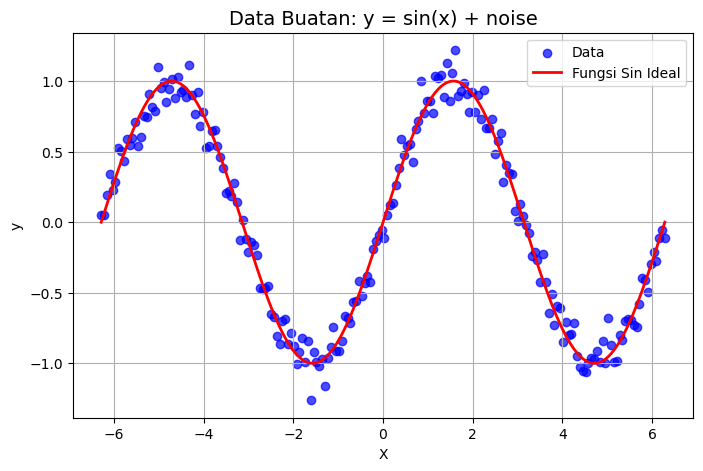

In [179]:
plt.figure(figsize=(8,5))
plt.scatter(df['X'], df['y'], color='blue', alpha=0.7, label='Data')
plt.plot(df['X'], np.sin(df['X']), color='red', linewidth=2, label='Fungsi Sin Ideal')
plt.title("Data Buatan: y = sin(x) + noise", fontsize=14)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Normalisasi
Fitur X dinormalisasi menggunakan `StandardScaler` agar memiliki mean 0 dan standar deviasi 1. Ini membantu ANN belajar lebih stabil dan cepat, karena skala data menjadi seragam.

In [180]:
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

## Split data
Dataset dibagi menjadi data training (training set) dan data testing (test set) menggunakan `train_test_split`. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengukur performa model pada data yang belum pernah dilihat.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Arsitektur ANN manual dengan 1 hidden layer (10 neuron, ReLU), output 1 neuron

In [182]:
input_dim = X_train.shape[1]
hidden_neurons = 10
output_dim = 1
lr = 0.01
epochs = 500

## Inisialisasi bobot
Bobot (W1, W2) diinisialisasi secara acak, bias (b1, b2) diinisialisasi nol. Inisialisasi acak membantu model memulai proses belajar tanpa simetri antar neuron.

In [183]:
W1 = np.random.randn(input_dim, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_dim)
b2 = np.zeros((1, output_dim))

In [184]:
losses = []

## Pembelajaran model
Akan dilakukan iterasi (for epoch in range(epochs)) untuk melatih model:
* Forward pass: hitung output dari input → hidden layer → output.
* Hitung loss (MSE).
* Backward pass (backpropagation): hitung turunan loss terhadap bobot.
* Update bobot dengan gradient descent menggunakan learning rate 0.01.

In [185]:
for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ W1 + b1
    a1 = np.maximum(0, z1)  # ReLU
    z2 = a1 @ W2 + b2
    y_pred = z2

    # Hitung loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)

    # Backpropagation
    dloss_dy = 2 * (y_pred - y_train) / y_train.shape[0]
    dW2 = a1.T @ dloss_dy
    db2 = np.sum(dloss_dy, axis=0, keepdims=True)

    da1 = dloss_dy @ W2.T
    dz1 = da1.copy()
    dz1[z1 <= 0] = 0
    dW1 = X_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update bobot
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

## Plot Loss
Grafik loss per epoch dibuat untuk memantau proses pembelajaran. Penurunan loss menunjukkan model belajar menyesuaikan bobotnya agar prediksi mendekati target.

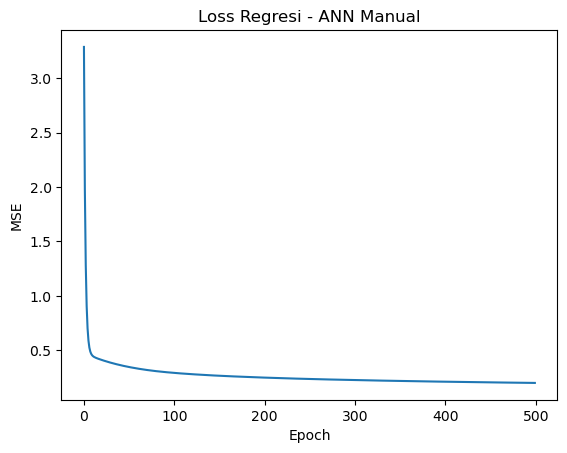

In [186]:
plt.plot(losses)
plt.title("Loss Regresi - ANN Manual")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

### Interpretasi
* Penurunan tajam di awal (epoch 0–50) → model dengan cepat belajar pola dasar dari data.
* Penurunan lambat setelahnya → model melakukan fine-tuning bobot untuk mengurangi error secara bertahap.
* Loss stabil mulai sekitar epoch 200–300 → proses pembelajaran sudah hampir mencapai titik optimal; tidak ada penurunan signifikan lagi.
* Nilai MSE akhir kecil (<0.3) → menunjukkan model cukup mampu mempelajari hubungan antara X dan y pada data training.

## Forward pass di test set
Setelah training, model melakukan forward pass pada data testing untuk menghasilkan prediksi. Tidak ada backpropagation di tahap ini, hanya perhitungan output.

In [187]:
z1_test = X_test @ W1 + b1
a1_test = np.maximum(0, z1_test)
y_pred_test = a1_test @ W2 + b2

In [188]:
y_pred_test.flatten()

array([ 0.0581018 ,  0.5507339 ,  0.34552219, -0.14384434,  0.34736001,
        0.44543454, -0.18802825, -0.34032608, -0.40582   ,  0.14031048,
       -0.14698591, -0.53680783, -0.25845869, -0.31115528, -0.60230174,
       -0.45494043, -0.0101781 , -0.04560347, -0.34002014, -0.17434747,
        0.41285393,  0.53705312,  0.01989044, -0.02381022, -0.13330513,
       -0.06490123, -0.31835464, -0.16066669,  0.39648045,  0.2818661 ,
        0.63281859,  0.50969156,  0.00350268, -0.27011294, -0.01285651,
        0.38708589,  0.23274566,  0.19999871, -0.24208521, -0.28379372])

## Metriks evaluasi

In [189]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [190]:
print(f"MSE Test : {mse_test:.4f}")
print(f"MAE Test : {mae_test:.4f}")
print(f"MAPE Test: {mape_test:.2f}%")
print(f"R² Test  : {r2_test:.4f}")

MSE Test : 0.2590
MAE Test : 0.4575
MAPE Test: 0.64%
R² Test  : 0.5440


### Interpretasi
* MSE Test = 0.2590 → rata-rata kuadrat error relatif kecil, artinya prediksi cukup mendekati nilai target.
* MAE Test = 0.4575 → rata-rata kesalahan absolut sekitar 0.46 unit, cukup moderat untuk skala data ini.
* MAPE Test = 64% → error persentase rata-rata tinggi (>50%), menandakan ada beberapa titik di mana prediksi jauh dari nilai target (kemungkinan saat nilai target mendekati nol, MAPE jadi besar).
* R² Test = 0.5440 → model hanya mampu menjelaskan sekitar 54% variasi pada data uji. Ini berarti performa cukup, tetapi masih banyak ruang untuk perbaikan.
* Kesimpulan umum: model sudah menangkap sebagian besar pola data sinus, tapi akurasi persentase masih rendah, kemungkinan karena noise tinggi dan keterbatasan kapasitas ANN manual sederhana ini.

## Tabel perbandingan target vs prediksi

In [191]:
df_eval = pd.DataFrame({
    'X': scaler_x.inverse_transform(X_test).flatten(),
    'y_target': y_test.flatten(),
    'y_prediksi': y_pred_test.flatten()
})

In [192]:
df_eval

,X,y_target,y_prediksi
0,-0.284164,-0.426707,0.058102
1,-5.335971,0.755563,0.550734
2,-4.388758,0.887916,0.345522
3,3.694134,-0.643983,-0.143844
4,1.799706,0.983879,0.347360
5,0.978788,0.859976,0.445435
6,-1.926002,-1.002087,-0.188028
7,4.451905,-1.055217,-0.340326
8,4.704496,-0.972300,-0.405820
9,-3.441544,0.223489,0.140310


## Plot hasil prediksi vs target
Scatter plot dibuat untuk membandingkan titik prediksi model (warna berbeda) dengan data target sebenarnya. Ini memudahkan visualisasi seberapa dekat prediksi dengan nilai target.

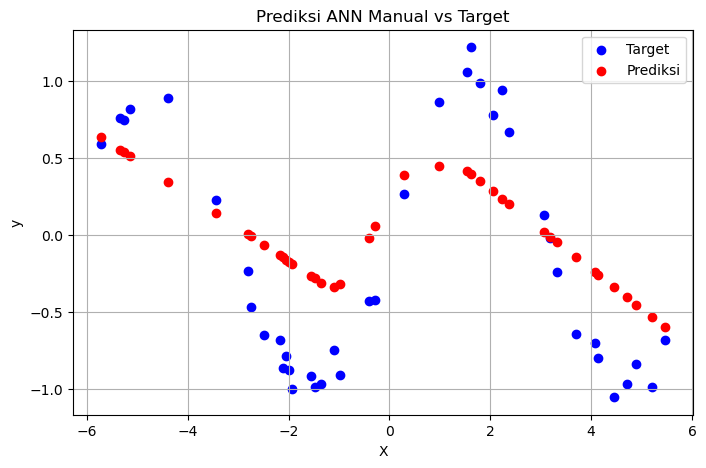

In [193]:
plt.figure(figsize=(8,5))
plt.scatter(scaler_x.inverse_transform(X_test), y_test, color='blue', label='Target')
plt.scatter(scaler_x.inverse_transform(X_test), y_pred_test, color='red', label='Prediksi')
plt.title("Prediksi ANN Manual vs Target")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Interpretasi
* Pola sinus umum masih tertangkap oleh model, tapi terdapat deviasi besar di beberapa bagian, khususnya di puncak dan lembah kurva.
* Model cenderung menghaluskan prediksi, sehingga variasi ekstrem pada data (karena noise atau bentuk sinus asli) tidak sepenuhnya diikuti.
* Kesalahan prediksi tampak lebih besar pada area transisi cepat (misalnya di sekitar x ≈ −5, x ≈ 2, dan x ≈ 4)
* Ini konsisten dengan metrik sebelumnya (R² = 0.544 dan MAPE tinggi), menandakan model sederhana ini hanya menangkap sebagian pola tetapi kurang mampu memodelkan variasi penuh data.

# ANN dengan Keras - Regresi (Dataset: Diabetes)
Membangun model Artificial Neural Network menggunakan Keras untuk memprediksi progresi penyakit diabetes berdasarkan 10 fitur medis, menggunakan pendekatan regresi.

## Load data diabetes
Mengambil dataset Diabetes dari `sklearn.datasets`. Dataset ini berisi fitur-fitur seperti umur, BMI, tekanan darah, dan hasil pengukuran biokimia yang digunakan untuk memprediksi perkembangan penyakit.

In [194]:
data = load_diabetes()
X = data.data
y = data.target

In [195]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [196]:
X.flatten()

array([ 0.03807591,  0.05068012,  0.06169621, ..., -0.03949338,
       -0.00422151,  0.00306441])

In [197]:
y.flatten()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Split dan scaling data
Membagi data menjadi training set dan test set (contohnya 80:20). Lalu melakukan normalisasi menggunakan `StandardScaler` untuk memastikan semua fitur memiliki skala yang sebanding, sehingga pelatihan ANN lebih stabil.

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model ANN untuk regresi
Membangun arsitektur jaringan saraf dengan 1 layer input, 2 hidden layer (64 neuron & 32 neuron, aktivasi ReLU), dan 1 neuron output untuk memprediksi nilai kontinu.

In [199]:
model_reg = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output 1 neuron untuk regresi
])

## Pembelajaran model regresi
Melatih model menggunakan optimizer Adam dan loss function MSE. Proses ini menyesuaikan bobot jaringan untuk meminimalkan kesalahan antara prediksi dan target.

In [200]:
model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = model_reg.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluasi
Mengevaluasi kinerja model dengan data test untuk melihat kemampuan generalisasi model terhadap data baru.

In [201]:
mse, mae = model_reg.evaluate(X_test, y_test, verbose=0)

In [202]:
print(f"MSE: {mse:.4f}, \nMAE: {mae:.4f}")

MSE: 3023.8918, 
MAE: 43.7518


* MSE = 3023.89 → rata-rata kuadrat error masih cukup besar, menandakan selisih prediksi terhadap target bervariasi cukup lebar.
* MAE = 43.75 → rata-rata prediksi meleset sekitar 43 poin dari nilai target.

## Plot Loss
Menampilkan grafik penurunan loss selama epoch pelatihan. Grafik ini menunjukkan bagaimana error menurun seiring bertambahnya iterasi training.

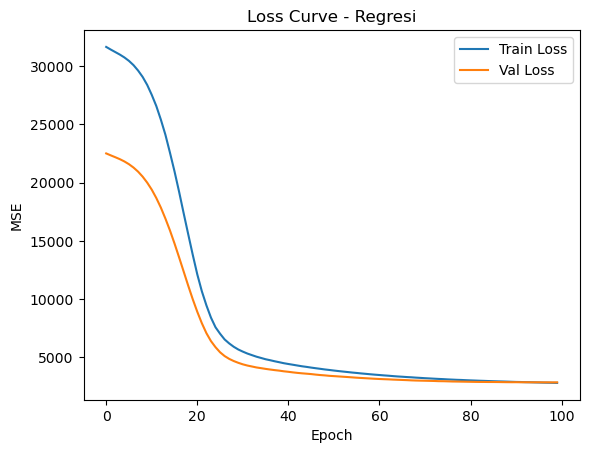

In [203]:
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title("Loss Curve - Regresi")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

### Interpretasi
* Train Loss dan Val Loss sama-sama menurun tajam pada awal epoch (0–20), menandakan model dengan cepat mempelajari pola dasar data.
* Setelah sekitar epoch ke-40, penurunan loss melambat dan mulai stabil, menunjukkan model mendekati konvergensi.
* Val Loss sedikit lebih rendah dari Train Loss di sebagian besar epoch, yang bisa terjadi akibat regularization effect dari data validation atau fluktuasi batch.
* Tidak terlihat tanda overfitting yang jelas (Val Loss tidak naik di akhir pelatihan), sehingga model cukup stabil

## Prediksi

In [204]:
y_pred_test = model_reg.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


## Metriks evaluasi

In [205]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [206]:
print(f"MSE Test : {mse_test:.4f}")
print(f"MAE Test : {mae_test:.4f}")
print(f"MAPE Test: {mape_test:.2f}%")
print(f"R² Test  : {r2_test:.4f}")

MSE Test : 3023.8919
MAE Test : 43.7518
MAPE Test: 0.38%
R² Test  : 0.4293


### Interpretasi
* MSE = 3023.89 → rata-rata kuadrat error cukup besar, menunjukkan prediksi masih sering meleset jauh dari target pada skala dataset diabetes.
* MAE = 43.75 → rata-rata prediksi meleset sekitar 43 poin dari nilai target sebenarnya.
* MAPE = 0.38% → persentase error relatif terhadap nilai target sangat kecil; ini tampaknya tidak konsisten dengan besarnya MAE, kemungkinan karena nilai target di dataset memiliki skala besar sehingga persen error terlihat kecil.
* R² = 0.4293 → model hanya mampu menjelaskan sekitar 42.93% variasi data, sisanya tidak terjelaskan oleh model.

## Tabel perbandingan target vs prediksi
Membuat tabel yang membandingkan nilai target sebenarnya dengan hasil prediksi, dilengkapi error

In [207]:
df_eval = pd.DataFrame({
    'y_target': y_test,
    'y_prediksi': y_pred_test.flatten(),
    'error': y_test - y_pred_test.flatten(),
})

In [208]:
df_eval.head()

,y_target,y_prediksi,error
0,219.0,163.102875,55.897125
1,70.0,199.191238,-129.191238
2,202.0,146.535339,55.464661
3,230.0,334.952484,-104.952484
4,111.0,86.956696,24.043304


### Interpretasi
Model menghasilkan error yang cukup besar di beberapa titik, baik overestimate maupun underestimate, yang menunjukkan bahwa prediksi belum stabil di seluruh rentang nilai target. Ada indikasi model masih kesulitan menangkap pola pada nilai ekstrem (sangat tinggi atau sangat rendah).

## Plot prediksi vs target
Membuat scatter plot antara nilai target dan nilai prediksi. Garis diagonal merah menunjukkan prediksi sempurna. Semakin dekat titik-titik ke garis ini, semakin baik akurasi model.

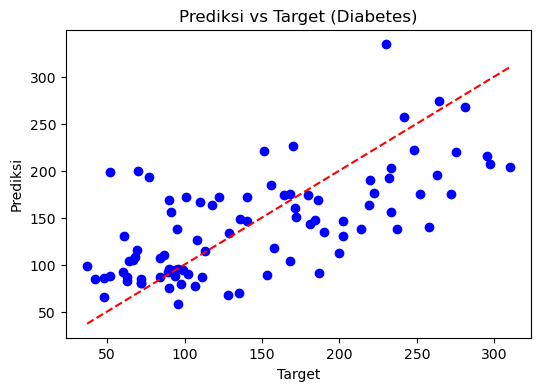

In [209]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Target')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Target (Diabetes)')
plt.show()

### Interpretasi
* Garis merah putus-putus adalah garis ideal di mana prediksi = target (error = 0).\
  Semakin dekat titik biru ke garis ini, semakin akurat model.
* Sebagian besar titik berada di sekitar garis, tetapi banyak juga yang menyebar cukup jauh, terutama di area nilai target yang tinggi dan rendah, menandakan error yang besar pada ekstrem data.
* Penyebaran titik yang cukup lebar menunjukkan bahwa model belum mampu memetakan hubungan input-output secara presisi.
* Ada indikasi bahwa model cenderung mengompresi rentang prediksi (nilai rendah diprediksi agak terlalu tinggi, nilai tinggi diprediksi agak terlalu rendah), pola umum pada model regresi yang underfitting.

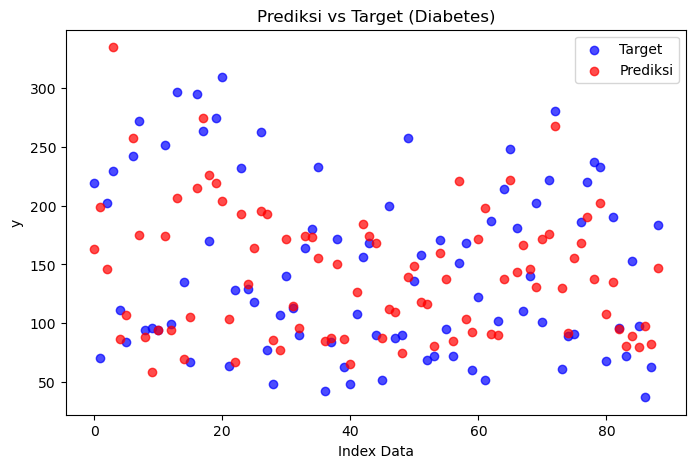

In [210]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Target', alpha=0.7)
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', label='Prediksi', alpha=0.7)
plt.xlabel('Index Data')
plt.ylabel('y')
plt.title('Prediksi vs Target (Diabetes)')
plt.legend()
plt.show()

### Interpretasi
* Pola titik merah cenderung mengikuti tren umum titik biru, artinya model menangkap sebagian hubungan antara fitur dan target.
* Namun, terdapat penyebaran yang cukup besar antara nilai prediksi dan target di banyak titik, terutama pada nilai target yang sangat tinggi atau sangat rendah, ini mengindikasikan adanya error prediksi yang signifikan pada sebagian data.
* Titik merah sering kali berada di tengah rentang nilai, yang menandakan model underfitting yaitu prediksi “tertarik” ke nilai rata-rata daripada benar-benar mengikuti variasi ekstrim pada data.
* Secara visual, prediksi terlihat lebih “rapat” dibandingkan sebaran target yang lebih luas, memperkuat dugaan bahwa model kurang mampu memprediksi kasus ekstrem.

# ANN dengan Keras - Klasifikasi Binary (Dataset: make_moons)
Membangun model artificial neural network sederhana untuk memisahkan dua kelas pada dataset sintetis make_moons, yang memiliki pola distribusi melengkung dan saling berbelit.

## Load dataset
Menghasilkan dataset sintetis dua dimensi menggunakan `make_moons` dari `sklearn.datasets` dengan parameter noise untuk menambah variasi data.

In [211]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

## Split data
Membagi data menjadi set training dan set testing agar model dapat diuji pada data yang belum pernah dilihat sebelumnya.

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling data
Menormalkan fitur menggunakan `StandardScaler` agar setiap fitur memiliki skala yang sebanding, membantu konvergensi pelatihan model.

In [213]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model klasifikasi biner
Menyusun arsitektur ANN menggunakan Keras Sequential dengan dua hidden layer beraktivasi ReLU dan satu output layer beraktivasi sigmoid untuk menghasilkan probabilitas kelas.

In [214]:
model_clf_bin = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Pembelajaran model klasifikasi
Melatih model menggunakan binary crossentropy sebagai fungsi loss dan Adam optimizer, sambil memantau akurasi pada data validasi di setiap epoch.

In [215]:
model_clf_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bin = model_clf_bin.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluasi
Menghitung nilai loss dan akurasi pada data testing untuk menilai performa model setelah pembelajaran.

In [216]:
loss, acc = model_clf_bin.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc:.4f}")

Akurasi: 0.9750


### Interpretasi
Akurasi 0.9750 berarti model mampu mengklasifikasikan data uji dengan benar sebesar 97,5%, menunjukkan kinerja yang sangat baik pada dataset ini.

## Plot akurasi
Menampilkan grafik perkembangan akurasi pelatihan dan validasi per epoch untuk melihat stabilitas dan tren pembelajaran.

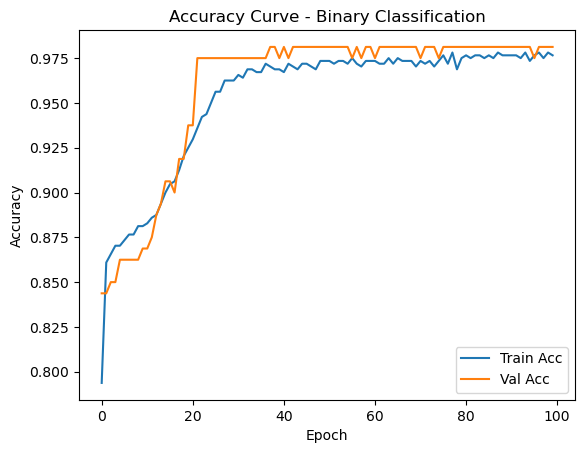

In [217]:
plt.plot(history_bin.history['accuracy'], label='Train Acc')
plt.plot(history_bin.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve - Binary Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Interpretasi
* Kurva akurasi menunjukkan bahwa model klasifikasi biner ini mengalami peningkatan performa yang konsisten pada awal pelatihan, di mana akurasi training dan validasi sama-sama naik tajam hingga sekitar epoch ke-20.
* Setelah itu, keduanya mendekati nilai ~98% dan stabil, dengan garis training (biru) dan validasi (oranye) hampir tumpang tindih. Kondisi ini mengindikasikan model mampu belajar dengan baik tanpa gejala overfitting yang signifikan, karena performa pada data validasi tidak menurun walaupun pelatihan berlanjut hingga epoch ke-100.
* Secara umum, ini menunjukkan bahwa arsitektur dan hyperparameter yang digunakan sudah efektif untuk memisahkan kelas pada dataset make_moons dengan tingkat kesalahan yang sangat rendah.

## Prediksi
Menghasilkan probabilitas prediksi pada data testing, lalu mengubahnya menjadi label biner (0 atau 1) berdasarkan ambang batas 0.5.

In [218]:
y_pred_prob = model_clf_bin.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [219]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1])

## Metriks evaluasi
Menghitung metrik akurasi, presisi, recall, dan F1-score untuk menilai kinerja model secara kuantitatif.

In [220]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [221]:
print(f"Akurasi     : {acc:.4f}")
print(f"Precision   : {prec:.4f}")
print(f"Recall      : {rec:.4f}")
print(f"F1-score    : {f1:.4f}")

Akurasi     : 0.9750
Precision   : 0.9798
Recall      : 0.9700
F1-score    : 0.9749


### Interpretasi
* Akurasi 97,50% menunjukkan bahwa hampir seluruh data uji (97,5 dari setiap 100 sampel) diklasifikasikan dengan benar. Ini mencerminkan kemampuan generalisasi model yang baik terhadap data yang belum pernah dilihat.
* Precision 97,98% berarti dari semua prediksi positif yang dihasilkan model, hanya sekitar 2% yang salah. Ini sangat penting jika kesalahan positif (false positive) berisiko tinggi, karena model jarang memberi "alarm palsu".
* Recall 97,00% mengindikasikan bahwa model berhasil menangkap hampir semua kasus positif yang sebenarnya ada di data, hanya kehilangan sekitar 3% dari total kasus positif. Ini krusial dalam konteks di mana kehilangan kasus positif lebih berbahaya.
* F1-score 97,49% berada hampir setara dengan precision dan recall, menandakan bahwa tidak ada ketimpangan signifikan di antara keduanya, dan model menjaga keseimbangan antara menghindari false positive dan false negative.

## Tabel perbandingan target vs prediksi
Menampilkan perbandingan antara label sebenarnya dan label prediksi untuk sampel data testing guna melihat kesesuaian hasil.

In [222]:
df_eval = pd.DataFrame({
    'y_target': y_test,
    'y_prediksi': y_pred,
    'prob_prediksi': y_pred_prob.flatten()
})

In [223]:
df_eval.head()

,y_target,y_prediksi,prob_prediksi
0,1,1,0.988182
1,0,0,0.000937
2,1,1,0.997832
3,0,0,0.000107
4,1,1,0.999996


## Classification report
Menyajikan ringkasan metrik evaluasi per kelas, termasuk presisi, recall, F1-score, dan jumlah sampel tiap kelas.

In [224]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Interpretasi
* Kelas 0 → precision 0,97 dan recall 0,98 berarti model jarang salah saat memprediksi 0 dan mampu menangkap hampir semua data kelas 0 yang sebenarnya.
* Kelas 1 → precision 0,98 dan recall 0,97 menunjukkan hasil yang setara, hanya terbalik sedikit dari kelas 0.
* Akurasi total 97% memperlihatkan bahwa dari 200 data uji, hanya sekitar 6 data yang salah klasifikasi.
* Macro average dan weighted average hampir identik (≈0,98 precision, 0,97 recall, 0,97 F1), yang menandakan distribusi data antar kelas seimbang dan performa model konsisten di keduanya.
* Singkatnya, model tidak bias terhadap salah satu kelas dan mampu memberikan prediksi yang tepat serta seimbang dengan tingkat kesalahan yang sangat rendah.

## Confusion matrix
Menunjukkan jumlah prediksi benar dan salah untuk tiap kelas dalam bentuk matriks, serta divisualisasikan dalam bentuk heatmap untuk memudahkan interpretasi.

In [227]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[98  2]
 [ 3 97]]


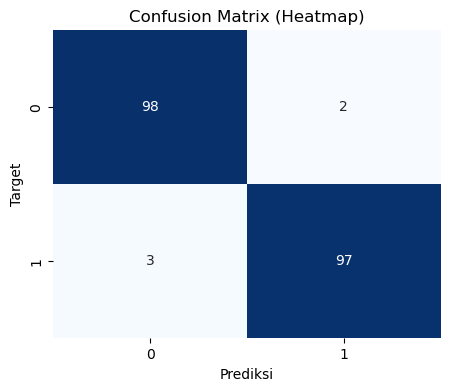

In [226]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Prediksi")
plt.ylabel("Target")
plt.title("Confusion Matrix (Heatmap)")
plt.show()

### Interpretasi
* Dari 100 data kelas 0 yang sebenarnya, 98 diprediksi benar sebagai kelas 0 (True Negative), dan 2 salah diprediksi sebagai kelas 1 (False Positive).
* Dari 100 data kelas 1 yang sebenarnya, 97 diprediksi benar sebagai kelas 1 (True Positive), dan 3 salah diprediksi sebagai kelas 0 (False Negative).
* Artinya, model sangat akurat, hanya membuat 5 kesalahan dari total 200 prediksi, dan kesalahan tersebut terbagi merata antar kelas, sehingga tidak ada indikasi bias yang signifikan.

## Decision Boundary
Memvisualisasikan area klasifikasi yang dipelajari model, di mana setiap warna mewakili prediksi kelas tertentu, sehingga terlihat batas pemisah antar kelas dan distribusi titik data sebenarnya.

5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step


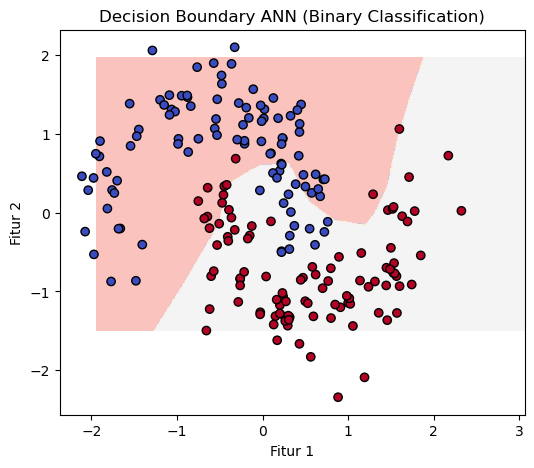

In [228]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_clf_bin.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary ANN (Binary Classification)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

### Interpretasi
* Plot ini memperlihatkan bagaimana model ANN Keras memisahkan dua kelas pada dataset make_moons.
* Warna latar merah muda menunjukkan area yang diprediksi sebagai kelas 1, sedangkan warna abu-abu muda menunjukkan area yang diprediksi sebagai kelas 0.
* Titik biru mewakili target kelas 0, dan titik merah gelap mewakili target kelas 1.
* Batas keputusan terlihat melengkung dan mengikuti pola data, menunjukkan kemampuan ANN menangkap hubungan non-linear.
* Meski sebagian besar titik berada di area yang benar, terdapat beberapa titik yang jatuh di area kelas lawan, menandakan adanya kesalahan prediksi terutama di dekat batas keputusan.
* Hal ini wajar mengingat distribusi data make_moons yang saling berbelit dan tumpang tindih.

# ANN dengan Keras - Klasifikasi Multi-Class (Dataset: Iris)
Membuat model jaringan saraf tiruan berbasis Keras untuk mengklasifikasikan bunga iris menjadi tiga spesies berdasarkan fitur panjang dan lebar kelopak serta sepal.

## Load dataset
Memuat dataset Iris yang tersedia di scikit-learn, berisi 150 sampel dengan 4 fitur numerik dan label kelas 0, 1, atau 2.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

## Encoding
Mengubah label kelas (0, 1, 2) menjadi format one-hot encoded agar dapat digunakan pada model multi-class, di mana setiap kelas direpresentasikan sebagai vektor biner.

In [3]:
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

## Split data
Membagi data menjadi set pelatihan (training set) dan set pengujian (test set) untuk memisahkan data yang digunakan untuk membangun model dan untuk mengevaluasinya.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Scaling data
Menstandarisasi fitur agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1, membantu model ANN belajar lebih efektif.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model multi-class
Membangun arsitektur ANN dengan Keras untuk klasifikasi multi-class, menggunakan lapisan Dense dengan aktivasi ReLU pada hidden layer dan Softmax pada output layer untuk menghasilkan probabilitas tiap kelas.

In [6]:
model_clf_multi = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

## Pembelajaran model multi-class
Melatih model pada data training dengan loss function `categorical_crossentropy` dan optimizer seperti Adam, sambil memantau akurasi pada data training dan validation.

In [7]:
model_clf_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_multi = model_clf_multi.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluasi
Mengukur kinerja model pada data uji menggunakan metrik seperti akurasi untuk melihat seberapa baik model mengklasifikasikan data yang belum pernah dilihat.

In [8]:
loss, acc = model_clf_multi.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc:.4f}")

Akurasi: 1.0000


Akurasi 1.0000 berarti model berhasil mengklasifikasikan 100% data uji dengan benar, menunjukkan kinerja sempurna pada dataset ini (kemungkinan karena dataset sederhana seperti Iris).

## Plot akurasi
Memvisualisasikan perkembangan akurasi model selama proses pelatihan untuk melihat pola peningkatan performa dan indikasi overfitting atau underfitting.

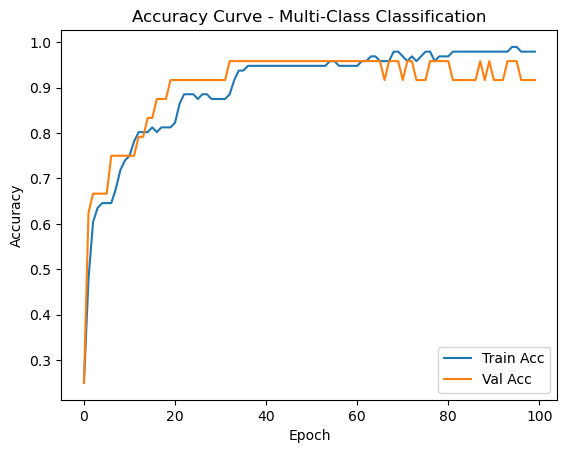

In [9]:
plt.plot(history_multi.history['accuracy'], label='Train Acc')
plt.plot(history_multi.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve - Multi-Class Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Interpretasi
* Awal pelatihan (epoch < 20):\
  Akurasi training dan validasi meningkat tajam, dari sekitar 0.25 menuju 0.9, menandakan model cepat belajar pola data.
* Pertengahan pelatihan (epoch 20–60):\
  Akurasi validasi sempat mencapai ~0.97 lebih dulu dibanding training, lalu mulai sedikit fluktuatif.
* Akhir pelatihan (epoch > 60):\
  Akurasi training mendekati 1.0, sementara akurasi validasi sedikit di bawahnya (~0.92–0.97) dengan sedikit penurunan pada beberapa titik yang mengindikasikan mild overfitting (“terlalu pintar”).
* Secara umum, model sangat baik dalam mempelajari data, meski sedikit gap antara train dan validation menunjukkan model mulai menghafal pola spesifik training.

## Prediksi

In [11]:
y_pred_proba = model_clf_multi.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # karena y_test sudah one-hot encoded

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


## Metrik evaluasi

In [26]:
acc = accuracy_score(y_test_classes, y_pred_classes)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Interpretasi
* Laporan klasifikasi ini menunjukkan performa sempurna pada ketiga kelas (0, 1, dan 2) di dataset iris.
* Precision, Recall, dan F1-score semuanya 1.00 untuk setiap kelas, artinya model tidak membuat kesalahan sama sekali dalam memprediksi data uji.
* Akurasi 1.00 menandakan semua 30 sampel di data uji terklasifikasi dengan benar.
* Macro avg dan weighted avg juga 1.00, menguatkan bahwa kinerja konsisten di semua kelas tanpa bias ke kelas tertentu.
* Dengan kata lain, model mampu mengenali pola antar kelas dengan sempurna di dataset ini, yang biasanya terjadi karena dataset iris cukup terpisah dengan jelas antar kelas.
* Namun, akurasi sempurna di dataset kecil tetap perlu diwaspadai — bisa jadi hasil ini sulit direplikasi di data yang lebih kompleks atau noisy.

## Confusion Matrix

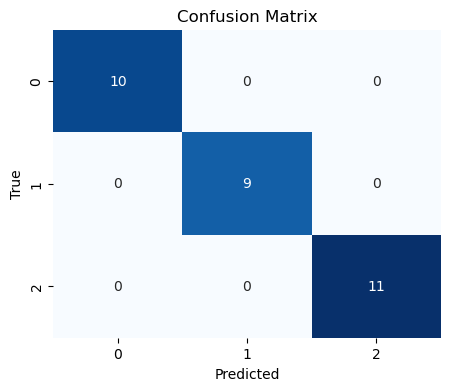

In [13]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Interpretasi
* Confusion matrix ini menunjukkan kinerja model klasifikasi multi-class pada dataset Iris, dan hasilnya sempurna.
* Kelas 0 → semua 10 sampel diprediksi sebagai kelas 0 (tidak ada kesalahan).
* Kelas 1 → semua 9 sampel diprediksi sebagai kelas 1 (tidak ada kesalahan).
* Kelas 2 → semua 11 sampel diprediksi sebagai kelas 2 (tidak ada kesalahan).
* Tidak ada nilai di luar diagonal utama, artinya tidak ada satupun data yang salah klasifikasi.
* Ini mengindikasikan pemisahan kelas yang sangat jelas pada data testing dan kemampuan model untuk mengenali pola dengan sangat baik.

## Tabel perbandingan target vs prediksi

In [16]:
df_eval = pd.DataFrame({
    'Target': y_test_classes,
    'Prediksi': y_pred_classes
})

In [17]:
df_eval

,Target,Prediksi
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


## Plot prediksi vs target

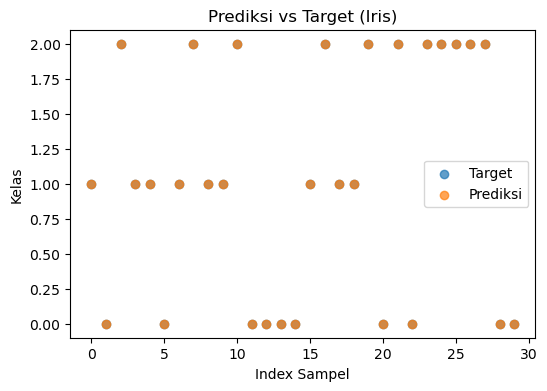

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test_classes)), y_test_classes, label="Target", alpha=0.7)
plt.scatter(range(len(y_pred_classes)), y_pred_classes, label="Prediksi", alpha=0.7)
plt.legend()
plt.title("Prediksi vs Target (Iris)")
plt.xlabel("Index Sampel")
plt.ylabel("Kelas")
plt.show()

### Interpretasi
* Plot ini menunjukkan perbandingan antara label target (biru) dan prediksi (oranye) untuk klasifikasi multi-class dataset Iris.
* Semua titik oranye (prediksi) tumpang tindih sempurna dengan titik biru (target) pada setiap sampel. Tidak ada pergeseran atau titik yang salah posisi, yang berarti model memprediksi semua kelas dengan akurasi 100% pada data uji.
* Hasil ini menguatkan temuan pada confusion matrix sebelumnya, bahwa model mampu memisahkan ketiga kelas dengan sangat baik tanpa kesalahan klasifikasi sama sekali.

## Kesimpulan
Hasil akhir proyek ini menunjukkan bahwa ANN memiliki fleksibilitas dan kekuatan yang tinggi dalam mempelajari pola data, baik untuk klasifikasi biner maupun multi-class. Pada kasus make_moons, model mampu mencapai akurasi tinggi meskipun data memiliki distribusi yang kompleks, sedangkan pada dataset Iris, model berhasil mencapai performa sempurna pada data uji, tanpa kesalahan klasifikasi. Visualisasi seperti accuracy curve, decision boundary, dan prediksi vs target tidak hanya memperjelas performa model, tetapi juga memberikan gambaran intuitif tentang bagaimana ANN mengambil keputusan.

Proyek ini bukan hanya membuktikan kemampuan ANN dalam menyelesaikan permasalahan klasifikasi, tetapi juga memberikan pemahaman menyeluruh terhadap alur kerja machine learning, mulai dari persiapan data hingga interpretasi hasil. Ke depan, model serupa dapat dikembangkan untuk dataset yang lebih kompleks, menambah lapisan atau neuron untuk meningkatkan kapasitas, atau menggabungkannya dengan teknik regularization guna mengatasi potensi overfitting. Dengan fondasi ini, langkah berikutnya adalah memperluas aplikasi ANN ke berbagai domain nyata yang memerlukan keputusan cerdas berbasis data.

# Thank You